<a href="https://colab.research.google.com/github/Vardhannn/ML/blob/main/ML_Lab2_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Lab Exercise-2**
House price prediction: 

a. Create a model that predicts a continuous value (price) from input features such as square feet, number of bedrooms,bathrooms etc. 

b. Implement a univariate Model using Least Squares and plot best-fit line 

c. Implement a multivariate Model using Least Squares and plot best-fit line 

d. Retrieve model error and model coefficients 

e. Observe Variance Inflation Factor(VIF) 

f. Implement Ridge regression model 

g. Implement LASSO regression model 

h. Report your observations on the above models for house prediction 

In [ ]:
dataset_link = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQV0ktrVSaCtsI_VeguDX64mEsDFE2YUc3Ypvz5-uOJp5zIfwGt-wlbX-QfnKWQRvHAj9mVAiOPGdQv/pub?gid=1780346880&single=true&output=csv"

In [ ]:
import numpy as np
import pandas as pd

dataset = pd.read_csv(dataset_link)

In [ ]:
dataset.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     21613 non-null  int64  
 1   id             21613 non-null  int64  
 2   date           21613 non-null  object 
 3   price          21613 non-null  int64  
 4   bedrooms       21600 non-null  float64
 5   bathrooms      21603 non-null  float64
 6   sqft_living    21613 non-null  int64  
 7   sqft_lot       21613 non-null  int64  
 8   floors         21613 non-null  float64
 9   waterfront     21613 non-null  int64  
 10  view           21613 non-null  int64  
 11  condition      21613 non-null  int64  
 12  grade          21613 non-null  int64  
 13  sqft_above     21613 non-null  int64  
 14  sqft_basement  21613 non-null  int64  
 15  yr_built       21613 non-null  int64  
 16  yr_renovated   21613 non-null  int64  
 17  zipcode        21613 non-null  int64  
 18  lat   

In [ ]:
dataset.isna().sum()

Unnamed: 0       0
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
# Replace missing values
dataset = dataset.fillna(dataset.mean())
# print(dataset)

<ipython-input-7-603bc2456f5d>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset = dataset.fillna(dataset.mean())


In [ ]:
dataset

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,21608,263000018,20140521T000000,360000,3.0,2.50,1530,1131,3.0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,21609,6600060120,20150223T000000,400000,4.0,2.50,2310,5813,2.0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,21610,1523300141,20140623T000000,402101,2.0,0.75,1020,1350,2.0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,21611,291310100,20150116T000000,400000,3.0,2.50,1600,2388,2.0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


#Univariate Regression

In [ ]:
x_data = dataset['sqft_living']
y_data = dataset['price']

In [ ]:
x_data

0        1180
1        2570
2         770
3        1960
4        1680
         ... 
21608    1530
21609    2310
21610    1020
21611    1600
21612    1020
Name: sqft_living, Length: 21613, dtype: int64

In [ ]:
# Create each single feature as a vector
x_data = np.array(x_data).reshape((-1,1))
print(x_data)

[[1180]
 [2570]
 [ 770]
 ...
 [1020]
 [1600]
 [1020]]


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)


print("shape of training samples:",x_train.shape)
print("shape of test samples :", x_test.shape)
print("shape of train labels :", y_train.shape)
print("shape of test labels:",y_test.shape)



shape of training samples: (18371, 1)
shape of test samples : (3242, 1)
shape of train labels : (18371,)
shape of test labels: (3242,)


In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
from numpy.ma.core import nonzero
lre=LinearRegression()

lre.fit(x_train,y_train)

LinearRegression()

In [ ]:
print("Intercept is ",lre.intercept_,"\n","Coef is",lre.coef_)

Intercept is  -43250.41440399282 
 Coef is [280.46173263]


In [ ]:
r_squared = lre.score(x_test, y_test)
print("R Square value is ",r_squared)

R Square value is  0.4910058627910613


In [ ]:

y_pred = lre.predict(x_test)
print(f"predicted response:\n{y_pred}")

predicted response:
[739237.81962359 413902.209777   621443.89192051 ... 601811.57063667
 643880.83053062 489626.87758612]


In [ ]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred)
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print("MSE is:", MSE)
print("RMSE is:", RMSE)
print("R_squared is:", r_squared)

MSE is: 74744588930.51276
RMSE is: 273394.5663880553
R_squared is: 0.4910058627910613


# Multivariate Regression

In [ ]:
x_data = dataset[[ 'bedrooms','bathrooms','sqft_living']]
y_data = dataset['price']

In [ ]:
x_data.head()

,bedrooms,bathrooms,sqft_living
0,3.0,1.00,1180
1,3.0,2.25,2570
2,2.0,1.00,770
3,4.0,3.00,1960
4,3.0,2.00,1680


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)


print("shape of training samples:",x_train.shape)
print("shape of test samples :", x_test.shape)
print("shape of train labels :", y_train.shape)
print("shape of test labels:",y_test.shape)

shape of training samples: (18371, 3)
shape of test samples : (3242, 3)
shape of train labels : (18371,)
shape of test labels: (3242,)


In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
lre=LinearRegression()

lre.fit(x_train,y_train)

LinearRegression()

In [ ]:
print("Intercept is ",lre.intercept_,"\n","Coefficients are",lre.coef_)

Intercept is  72899.24160187307 
 Coefficients are [-57515.38296981   9367.46131626    308.26888851]


In [ ]:
r_squared = lre.score(x_test, y_test)
print("R Square value is ",r_squared)

R Square value is  0.5058362894062202


In [ ]:

y_pred = lre.predict(x_test)
print(f"predicted response:\n{y_pred}")

predicted response:
[728668.42729349 423908.16893015 702516.93341234 ... 625764.59357569
 621515.13987002 507140.76882864]


In [ ]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred)
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print("MSE is:", MSE)
print("RMSE is:", RMSE)
print("R_squared is:", r_squared)

MSE is: 72566775749.61328
RMSE is: 269382.21127166745
R_squared is: 0.5058362894062202


# Observe Variance Inflation Factor(VIF)


In [ ]:
!pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor  
import statsmodels.api as sm

X = dataset[['sqft_living', 'bedrooms', 'bathrooms']]
y = dataset['price']

# Add constant to predictor variables for intercept term
X = sm.add_constant(X)

# Compute VIF for each predictor variable
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["predictor"] = X.columns

print(vif)

   VIF Factor    predictor
0   15.705003        const
1    2.628055  sqft_living
2    1.534145     bedrooms
3    2.378767    bathrooms


# Implement Ridge Regression Model

In [ ]:
x_data = dataset['sqft_living']
y_data = dataset['price']
# Create each single feature as a vector
x_data = np.array(x_data).reshape((-1,1))
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

ridge_model = Ridge(alpha=0.0)

ridge_model.fit(x_train, y_train)

y_pred = ridge_model.predict(x_test)

print("RSquared Error : ", ridge_model.score(x_test,y_test))
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)

RSquared Error :  0.4910058627910614
Mean Squared Error:  74744588930.51274


# LASSO Regression Model

In [ ]:
from sklearn import datasets 
from sklearn.linear_model import Lasso

# Create an instance of Lasso Regression implementation
lasso = Lasso(alpha=0.2)

# Fit the Lasso model
lasso.fit(x_train, y_train)
y_pred = lasso.predict(x_test)

# Create the model score

print("Model Score : ",lasso.score(x_test, y_test))
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)

Model Score :  0.49100586278808034
Mean Squared Error:  74744588930.95052


# Observation on above models

**For Univariate model**

In [ ]:
X = dataset['sqft_living']
y = dataset['price']

In [ ]:
# calculate the slope and intercept of the best-fit line
slope = np.sum((X - np.mean(X)) * (y - np.mean(y))) / np.sum((X - np.mean(X)) ** 2)
intercept = np.mean(y) - slope * np.mean(X)

In [ ]:
print(slope, intercept)

280.6235678974483 -43580.74309447408


In [ ]:
lre=LinearRegression()
lre.fit(np.array(X).reshape((-1,1)),y)
pred_slope = lre.coef_
pred_intercept = lre.intercept_

In [ ]:
print(pred_slope, pred_intercept)

[280.6235679] -43580.74309447396


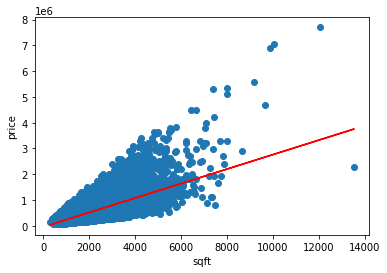

In [ ]:
# plot the scatter plot and the best-fit line
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.plot(X, slope * X + intercept, color='red')
plt.xlabel('sqft')
plt.ylabel('price')
plt.show()

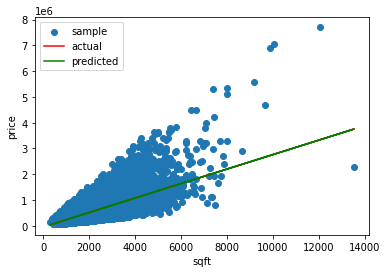

In [ ]:
# plot the scatter plot and the best-fit line
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.plot(X, slope * X + intercept, color='red')
plt.plot(X, pred_slope * X + pred_intercept, color='green')
plt.legend(['sample','actual','predicted'])
plt.xlabel('sqft')
plt.ylabel('price')
plt.show()

**For Multivariate model**

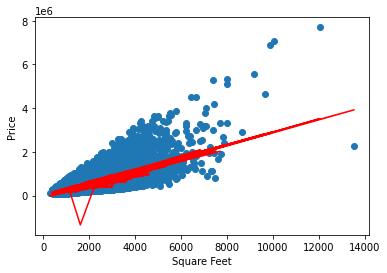

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# input features
sqft = dataset['sqft_living']
bedrooms = dataset['bedrooms']
bathrooms = dataset['bathrooms']

# target variable
price = dataset['price']

# combine input features into a single matrix
X = np.column_stack((sqft, bedrooms, bathrooms))

# add a column of ones for the intercept term
X = np.hstack((np.ones((len(X), 1)), X))

# calculate the least squares solution for the model coefficients
w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(price)

# calculate predicted values of the target variable
y_pred = X.dot(w)

# plot the scatter plot and best-fit line
fig, ax = plt.subplots()
ax.scatter(sqft, price)
ax.plot(sqft, y_pred, color='red')
ax.set_xlabel('Square Feet')
ax.set_ylabel('Price')
plt.show()